# Project description

> In this project we are going to attempt to accurately predict stock market prices on the long run.

> We will use the following 8 major technology companies' stock market data as the learning dataset:

 Company | Stock symbol
 --- | ---
  Amazon | AMZN
 AMD | AMD
 Apple | AAPL
 Facebook | FB
 Google | GOOGL
 Intel | INTC
 Microsoft | MSFT
 NVIDIA | NVDA

# Stock market datasets

> These are the links to the datasets that we used:

>* [Huge Stock Market Dataset](https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs)

>* [Google, Amazon, Facebook, Aapple stock prices](https://www.kaggle.com/stexo92/gafa-stock-prices)

>* [New York Stock Exchange Database](https://www.kaggle.com/dgawlik/nyse)

# Colab environment setup

> Since we are going to use mainly Kaggle datasets, we have to use the Kaggle API if we don't want to manually download them from **Kaggle**, and upload them to **Google Colab**.  Fortunatelly Kaggle has a package for this purpose. Google Colab comes with various pre-installed python packages, but not with this one, so our first step is installing it.

>Next, we can import it as well as all other python package we are planning to use.

> After importing the Kaggle package, we can upload the API key to colab. The Kaggle API client expects this file to be in ~/.kaggle, so we move it there, and we can start to download our datasets.

In [0]:
# Install packages
!pip install kaggle

    100% |████████████████████████████████| 61kB 5.5MB/s 
    100% |████████████████████████████████| 245kB 10.7MB/s 
  Running setup.py bdist_wheel for kaggle ... - \ done
  Stored in directory: /root/.cache/pip/wheels/5a/2d/0c/9fc539e558586b9ed9127916a7f4e620163c24cc97460b1188
  Running setup.py bdist_wheel for python-slugify ... - done
  Stored in directory: /root/.cache/pip/wheels/e3/65/da/2045deea3098ed7471eca0e2460cfbd3fdfe8c1d6fa6fcac92
Successfully built kaggle python-slugify


In [0]:
# Import dependecies

# Provides a portable way of using operating system dependent functionality
import os
# Provides regular expression matching operations
import re
# Provides various time-related functions
import time

import csv

import sys

import nltk

from functools import reduce
# Supplies classes for manipulating dates and times
from datetime import datetime
# Represents filesystem paths
from pathlib import Path

# Fundamental package for scientific computing
import numpy as np
# Python Data Analysis Library
import pandas as pd
# Calculates a Pearson correlation coefficient for testing non-correlation.
from scipy.stats import pearsonr
# Transforms features by scaling each feature to a given range.
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# Data visualization tool
import matplotlib.pyplot as plt
%matplotlib inline
# Data visualization tool
import seaborn as sns
sns.set()

In [0]:
# Upload kaggle API key
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zsombroo","key":"beca56f668daa240c2006abd50578bee"}'}

In [0]:
# Ensure it is there
!ls -lha kaggle.json

# The Kaggle API client expects this file to be in ~/.kaggle, so lets move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

-rw-r--r-- 1 root root 64 Dec  9 17:16 kaggle.json


# Data acquisition and preparation

> To get the desired training, validating and testing sets in a homogeneous format, we have to filter the datasets for data belonging to the choosen companies, and merge them into one dictionary of datasets. This breaks down to the following steps:

> 1\. We download, unzip, move the files to their desired destination.

> 2\. Then we load the data into pandas DataFrames, and create the dictionary for the final datasets.

> 3\. We filter each one of them for the choosen companies and append the records to the final datasets.

> 4\. We merged the companies' data to lenghten the timespan where we have records.

In [0]:
# Download stock market prices datasets
!kaggle datasets download -d dgawlik/nyse
!kaggle datasets download -d stexo92/gafa-stock-prices
!kaggle datasets download -d borismarjanovic/price-volume-data-for-all-us-stocks-etfs

# Download news datasets
!kaggle datasets download -d aaron7sun/stocknews
!kaggle datasets download -d snapcrack/all-the-news
!kaggle datasets download -d census/business-and-industry-reports
!kaggle datasets download -d therohk/million-headlines
!kaggle datasets download -d census/total-business-inventories-and-sales-data

!wget http://cache.getdata.io/n4722_fe1122d666811ef721fdcb4137c664b1eses/1539302400_all.csv

 88% 29.0M/32.8M [00:00<00:00, 16.4MB/s]
100% 32.8M/32.8M [00:00<00:00, 61.2MB/s]
  0% 0.00/398k [00:00<?, ?B/s]
100% 398k/398k [00:00<00:00, 69.6MB/s]
 97% 238M/245M [00:03<00:00, 88.7MB/s]
100% 245M/245M [00:03<00:00, 78.4MB/s]
 82% 5.00M/6.09M [00:00<00:00, 30.2MB/s]
100% 6.09M/6.09M [00:00<00:00, 35.9MB/s]
 97% 244M/253M [00:03<00:00, 68.4MB/s]
100% 253M/253M [00:03<00:00, 80.1MB/s]
 75% 5.00M/6.66M [00:00<00:00, 16.3MB/s]
100% 6.66M/6.66M [00:00<00:00, 21.2MB/s]
 27% 5.00M/18.6M [00:00<00:01, 13.2MB/s]
100% 18.6M/18.6M [00:00<00:00, 43.1MB/s]
  0% 0.00/20.7k [00:00<?, ?B/s]
100% 20.7k/20.7k [00:00<00:00, 13.1MB/s]
--2018-12-09 17:24:56--  http://cache.getdata.io/n4722_fe1122d666811ef721fdcb4137c664b1eses/1539302400_all.csv
Resolving cache.getdata.io (cache.getdata.io)... 52.216.20.91
Connecting to cache.getdata.io (cache.getdata.io)|52.216.20.91|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11850 (12K) [application/csv]
Saving to: ‘1539302400_all.csv’

1

In [0]:
# Check downloads
!ls

1539302400_all.csv
all-the-news.zip
business-and-industry-reports.zip
gafa-stock-prices.zip
kaggle.json
million-headlines.zip
nyse.zip
price-volume-data-for-all-us-stocks-etfs.zip
sample_data
stocknews.zip
total-business-inventories-and-sales-data.zip


In [0]:
# Creating directory hierarchy
!mkdir data
!mkdir data/news
!mkdir data/stocks
!mkdir data/stock_exchange
!mkdir data/sales_data
# Unzipping the downloaded files and moving them into the respective directories
!unzip stocknews.zip -d data/news
!unzip price-volume-data-for-all-us-stocks-etfs.zip -d data/stocks
!unzip data/stocks/Data.zip -d data/stocks
!unzip all-the-news.zip -d data/news
!unzip business-and-industry-reports.zip -d data/news
!unzip gafa-stock-prices.zip -d data/stocks
!unzip million-headlines.zip -d data/news
!unzip nyse.zip -d data/stock_exchange
!unzip stock-price.zip -d data/stocks
!unzip total-business-inventories-and-sales-data.zip -d data/sales_data
# Removing excess files
!rm stocknews.zip
!rm price-volume-data-for-all-us-stocks-etfs.zip
!rm all-the-news.zip
!rm business-and-industry-reports.zip
!rm gafa-stock-prices.zip
!rm million-headlines.zip
!rm nyse.zip
!rm stock-price.zip
!rm total-business-inventories-and-sales-data.zip

Archive:  stocknews.zip
  inflating: data/news/Combined_News_DJIA.csv  
  inflating: data/news/DJIA_table.csv  
  inflating: data/news/RedditNews.csv  
Archive:  price-volume-data-for-all-us-stocks-etfs.zip
  inflating: data/stocks/Data.zip    
Archive:  data/stocks/Data.zip
  inflating: data/stocks/ETFs/aadr.us.txt  
  inflating: data/stocks/ETFs/aaxj.us.txt  
  inflating: data/stocks/ETFs/acim.us.txt  
  inflating: data/stocks/ETFs/actx.us.txt  
  inflating: data/stocks/ETFs/acwf.us.txt  
  inflating: data/stocks/ETFs/acwi.us.txt  
  inflating: data/stocks/ETFs/acwv.us.txt  
  inflating: data/stocks/ETFs/acwx.us.txt  
  inflating: data/stocks/ETFs/adra.us.txt  
  inflating: data/stocks/ETFs/adrd.us.txt  
  inflating: data/stocks/ETFs/adre.us.txt  
  inflating: data/stocks/ETFs/adru.us.txt  
  inflating: data/stocks/ETFs/afk.us.txt  
  inflating: data/stocks/ETFs/agf.us.txt  
  inflating: data/stocks/ETFs/agg.us.txt  
  inflating: data/stocks/ETFs/agnd.us.txt  
  inflating: data/stock

In [0]:
# Check files
!ls -R

.:
1539302400_all.csv  data  kaggle.json  sample_data

./data:
news  sales_data  stock_exchange  stocks

./data/news:
abcnews-date-text.csv  articles3.csv	       DJIA_table.csv  RedditNews.csv
articles1.csv	       Combined_News_DJIA.csv  metadata.csv
articles2.csv	       data.csv		       notes.txt

./data/sales_data:
total-business-inventories_1.csv
total-business-inventories_2.csv
total-business-inventories.csv
total-business-inventories_metadata_1.json
total-business-inventories_metadata_2.json
total-business-inventories_metadata.json
total-business-inventories-to-sales-ratio_1.csv
total-business-inventories-to-sales-ratio.csv
total-business-inventories-to-sales-ratio_metadata_1.json
total-business-inventories-to-sales-ratio_metadata.json
total-business-sales_1.csv
total-business-sales_2.csv
total-business-sales.csv
total-business-sales_metadata_1.json
total-business-sales_metadata_2.json
total-business-sales_metadata.json

./data/stock_exchange:
fundamentals.csv  prices.csv  prices-

In [0]:
# Get the files' names containing our target stocks' market prices
targets = ['AAPL', 'MSFT', 'GOOGL', 'FB', 'AMZN', 'INTC', 'NVDA', 'AMD']
stocks = []
for i in range(0,len(targets)):
  stocks.append(list(Path('./data/stocks/Stocks').rglob(targets[i].lower()+'.us.[tT][xX][tT]'))[0])
stocks.append(list(Path('./data/stocks').rglob('*.[cC][sS][Vv]'))[0])
stocks.append(list(Path('./data/stock_exchange').rglob('prices.[cC][sS][Vv]'))[0])

for s in stocks:
  print(s)

data/stocks/Stocks/aapl.us.txt
data/stocks/Stocks/msft.us.txt
data/stocks/Stocks/googl.us.txt
data/stocks/Stocks/fb.us.txt
data/stocks/Stocks/amzn.us.txt
data/stocks/Stocks/intc.us.txt
data/stocks/Stocks/nvda.us.txt
data/stocks/Stocks/amd.us.txt
data/stocks/GAFA Stock Prices.csv
data/stock_exchange/prices.csv


In [0]:
# Filter out corrupted files
failed_files = []
succeeded_files = []

for i in stocks:
  try:
    df = pd.read_csv(i, sep=',')
    succeeded_files.append(i)
  except Exception:
    failed_files.append(i)
    
print('Succeeded:', len(succeeded_files), 'Failed:', len(failed_files))

Succeeded: 10 Failed: 0


In [0]:
# Read stock prices data files
dfs = {}
for sf in succeeded_files:
  df = pd.read_csv(sf, sep=',')
  dfs[sf.as_posix()] = df

We are going to use these values:

['Date', 'Open', 'High', 'Low', 'Close', 'Volume']

In [0]:
# Printing out stock price data files for checking
for k, v in dfs.items():
  print(k, v.columns)

data/stocks/Stocks/aapl.us.txt Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')
data/stocks/Stocks/msft.us.txt Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')
data/stocks/Stocks/googl.us.txt Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')
data/stocks/Stocks/fb.us.txt Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')
data/stocks/Stocks/amzn.us.txt Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')
data/stocks/Stocks/intc.us.txt Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')
data/stocks/Stocks/nvda.us.txt Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')
data/stocks/Stocks/amd.us.txt Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')
data/stocks/GAFA Stock Prices.csv Index(['Stock', 'Date', 'Open', 'High', 

'GAFA Stock Prices.csv' and 'prices.csv' contains multiple stocks' prices, so we have to filter them.

In [0]:
# Permanent storage of prepared datasets
stock_dict = {}

In [0]:
# Prepare GAFA Stock Prices.csv
gafa_df = dfs['data/stocks/GAFA Stock Prices.csv']
# The GAFA database refers to comanpies' stocks as the companies' names,
# we have to map the companies'names onto their stocks
co_to_stock_mapping = {
    'Amazon': 'AMZN',
    'Apple': 'AAPL',
    'Facebook': 'FB',
    'Google': 'GOOGL'
}
# Convert string date to unix timestamp
gafa_new = list(
    map(
        lambda x:
        [
            x[0],  # Stock
            datetime.strptime(x[1], '%d/%m/%Y').timestamp(),  # Timestamp
            x[2],  # Open
            x[3],  # High
            x[4],  # Low
            x[5],  # Close
            x[7]  # Volume
        ],
        gafa_df.values
    )
)
gafa_dict = {}
# Create new dataframe
gafa_df = pd.DataFrame(gafa_new, columns=['Stock', 'Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'])
# Filter on stocks, columns and sort by timestamp
for stock in sorted(set(gafa_df.values[:, 0])):
  df = gafa_df.loc[gafa_df['Stock'] == stock]
  df = df[['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume']]
  df = df.sort_values(['Timestamp'])
  df = df.loc[df['Timestamp'] <= 1510272000.0]
  df = df.dropna()
  df = df.reset_index(drop=True)
  # Save our new dataframe to a dictionary
  gafa_dict[co_to_stock_mapping.get(stock)] = df

In [0]:
# Prepare prices.csv
prices_df = dfs['data/stock_exchange/prices.csv']

# Converting data format
def simple_date_format_converter(x):
  for fmt in ('%Y-%m-%d', '%Y-%m-%d %H:%M:%S'):
    try:
      return datetime.strptime(x, fmt)
    except ValueError:
      pass
# Convert string date to unix timestamp
prices_new = list(
    map(
        lambda x:
        [
            x[1],  # Stock
            simple_date_format_converter(x[0]).timestamp(),  # TimeStamp
            x[2],  # Open
            x[5],  # High
            x[4],  # Low
            x[3],  # Close
            x[6]  # Volume
        ],
        prices_df.values
    )
)
prices_dict = {}
# Create new dataframe
prices_df = pd.DataFrame(prices_new, columns=['Stock', 'Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'])
# Filter on stocks, columns and sort by timestamp
for stock in sorted(set(prices_df.values[:, 0]).intersection(set(targets))):
  df = prices_df.loc[prices_df['Stock'] == stock]
  df = df[['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume']]
  df = df.sort_values(['Timestamp'])
  df = df.loc[df['Timestamp'] <= 1510272000.0]
  df = df.dropna()
  df = df.reset_index(drop=True)
  # Save our new dataframe to a dictionary
  prices_dict[stock] = df

In [0]:
# Prepare single stock datasets

# Collect names of single stock files
txt_databases = []

for k in dfs.keys():
  if k.endswith('.us.txt'):
    txt_databases.append(k)

for f in txt_databases:
  df = dfs[f]
  # Convert string date to unix timestamp
  df_new = list(
      map(
          lambda x:
          [
              datetime.strptime(x[0], '%Y-%m-%d').timestamp(),  # Timestamp
              x[1],  # Open
              x[2],  # High
              x[3],  # Low
              x[4],  # Close
              x[5]  # Volume
          ],
          df.values
      )
  )
  df = pd.DataFrame(df_new, columns=['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'])
  # Sort dataframe by timestamp
  df = df.sort_values(['Timestamp'])
  df = df.loc[df['Timestamp'] <= 1510272000.0]
  df = df.dropna()
  df = df.reset_index(drop=True)
  # Save our new dataframe to a dictionary
  stock_dict[f.split('/')[-1].split('.')[0].upper()] = df

In [0]:
# Merging dataframes
for k in stock_dict.keys():
  # Appending dataframes
  if k in gafa_dict.keys():
    stock_dict[k] = stock_dict[k].append(gafa_dict[k])
    print(k, 'was found in gafa_dict, and appended it to stock_dict[', k, ']')
  if k in prices_dict.keys():
    stock_dict[k] = stock_dict[k].append(prices_dict[k])
    print(k, 'was found in prices_dict, and appended it to stock_dict[', k, ']')
  # Droping duplicates
  stock_dict[k] = stock_dict[k].drop_duplicates('Timestamp')
  stock_dict[k] = stock_dict[k].sort_values(['Timestamp'])
  stock_dict[k] = stock_dict[k].reset_index(drop=True)

# Setting temp dicts to None to prevent accidental use
gafa_dict = None
prices_dict = None

AAPL was found in gafa_dict, and appended it to stock_dict[ AAPL ]
AAPL was found in prices_dict, and appended it to stock_dict[ AAPL ]
MSFT was found in prices_dict, and appended it to stock_dict[ MSFT ]
GOOGL was found in gafa_dict, and appended it to stock_dict[ GOOGL ]
GOOGL was found in prices_dict, and appended it to stock_dict[ GOOGL ]
FB was found in gafa_dict, and appended it to stock_dict[ FB ]
FB was found in prices_dict, and appended it to stock_dict[ FB ]
AMZN was found in gafa_dict, and appended it to stock_dict[ AMZN ]
AMZN was found in prices_dict, and appended it to stock_dict[ AMZN ]
INTC was found in prices_dict, and appended it to stock_dict[ INTC ]
NVDA was found in prices_dict, and appended it to stock_dict[ NVDA ]


# Visualization

> Before we start training the network and see the results, we want to take a look at the data at hand. We can do all sorts of interesting analysis with it, but here we will only make two types of diagrams.

> 1\. We draw a diagram where we can see the time intervals of all the companies. This provides us with an easy way to narrow down to the interception of the time frames.

> 2\. We make a heatmap of the Pearson correlation coefficients. This provides us with an insight to the relationships between the different companies's stock value. For this, we have to make a two-dimensional array that we fill up with the values from the Pearson correlaton coefficients. Then, we use the Seaborn library to draw the actual heatmap. 

> 3\. We want to take a look at the data itself in its purest form. We draw two diagrams for each company: one that shows us the gradual changing of the stocks's value, and one that show as the daily change in the value.

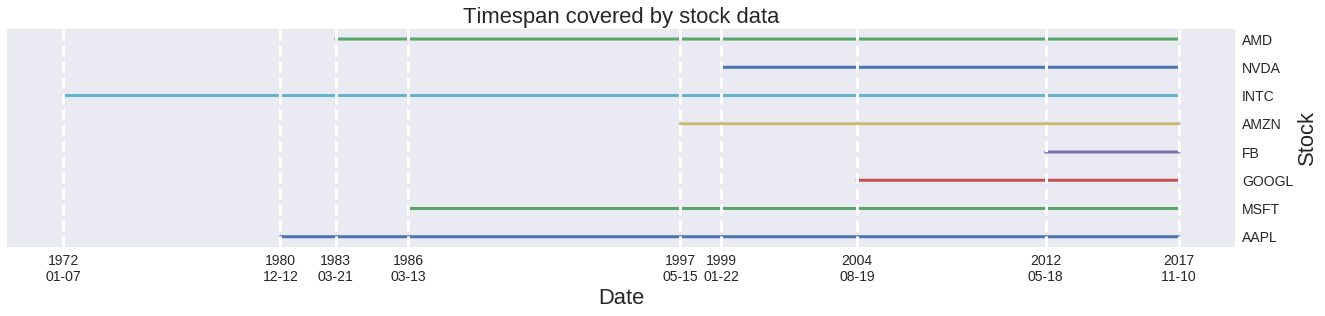

In [0]:
# Visualize the time span where we have data of stock prices
keys = stock_dict.keys()

# Creating custom x axis labels
start_at = []
ends_at = []
for k in keys:
  ts = stock_dict[k].values[0, 0]
  ts_end = stock_dict[k].values[-1, 0]
  start_at.append([ts, datetime.utcfromtimestamp(ts).strftime('%Y\n%m-%d')])
  ends_at.append([ts_end, datetime.utcfromtimestamp(ts_end).strftime('%Y\n%m-%d')])
  
start_at.append(sorted(ends_at)[0])
ts = [i[0] for i in sorted(start_at)]
st = [i[1] for i in sorted(start_at)]

# Plot
fig, ax = plt.subplots(1, 1, figsize=(22, 4))
for k in keys:
  ax.plot(
      stock_dict[k]['Timestamp'].values, 
      [list(keys).index(k)] * len(stock_dict[k]['Open'].values), 
      label=k, 
      linewidth=3
  )

for t in ts:
  plt.axvline(x=t, color='w', linestyle='dashed', linewidth=3)
  
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")

plt.xticks(ts, st, fontsize=14)
plt.xlabel('Date', fontsize=22)

plt.yticks([list(keys).index(k) for k in keys], keys, fontsize=14)
plt.ylabel('Stock', fontsize=22)

plt.title("Timespan covered by stock data", fontsize=22)
plt.grid()
plt.show()

In [0]:
# Function to make showing timestamps in a readable format easier
def convert_to_ticks(x, n=6, date_format='%Y-%m-%d'):
  step = int(len(x)/n)
  ticks_ts = []
  ticks_string = []
  for i in range(n):
    ts = x[i * step]
    ticks_ts.append(ts)
    ticks_string.append(datetime.utcfromtimestamp(ts).strftime(date_format))
  ticks_ts.append(x[-1])
  ticks_string.append(datetime.utcfromtimestamp(x[-1]).strftime(date_format))
  return ticks_ts, ticks_string

In [0]:
# Calculate Pearson correlation coefficients
stock_correlations = {}
list_of_names = list(stock_dict.keys())

for i1 in range(len(list_of_names)):
  for i2 in range(i1+1, len(list_of_names)):
    # We iterate through the companies in a way that all pairings only happen once
    key1 = list_of_names[i1]
    key2 = list_of_names[i2]
    dataframe1 = stock_dict[key1]
    dataframe2 = stock_dict[key2]
    # We calculate the time frame intersection between the data of the two companies
    ins = set(dataframe1.values[:, 0]).intersection(set(dataframe2.values[:, 0]))
    df1_kozos = dataframe1.loc[dataframe1['Timestamp'].isin(ins)]
    df2_kozos = dataframe2.loc[dataframe2['Timestamp'].isin(ins)]
    # We calculate and store the calculated results
    tmp = pearsonr(df1_kozos.values[:, 1], df2_kozos.values[:, 1])
    stock_correlations[(key1, key2)] = [tmp[0], tmp[1]]

In [0]:
# Preparing correlation data for seaborn heatmap
stock_table = np.full(shape=(8, 8), fill_value=np.NaN)
for i1 in range(len(list_of_names)):
  for i2 in range(i1+1, len(list_of_names)):
    key1 = list_of_names[i1]
    key2 = list_of_names[i2]
    stock_table[i1, i2] = stock_correlations[(key1, key2)][0]
# Create pandas dataframe from the correlation 2D array
df = pd.DataFrame(stock_table, index=list_of_names, columns=list_of_names)
# Seaborn heatmap requires the axes to be named
df = df.rename_axis('Stocks A')
df = df.rename_axis('Stocks B', axis="columns")
# First columns contains only NaN, so we can drop it
df = df.drop(df.columns[0], axis=1)
# Last row contains only NaN, so we can drop it
df = df.drop(df.index[len(df)-1])

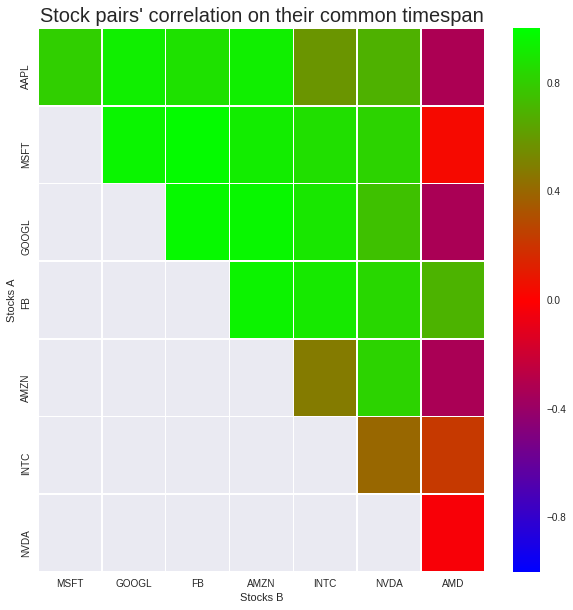

In [0]:
# Drawing a Seaborn heatmap for the correlations
f, ax = plt.subplots(figsize=(10, 10))
plt.title("Stock pairs' correlation on their common timespan", fontsize=20)
ax = sns.heatmap(df, linewidths=.5, ax=ax, cmap='brg', vmin=-1.0, vmax=1.0)

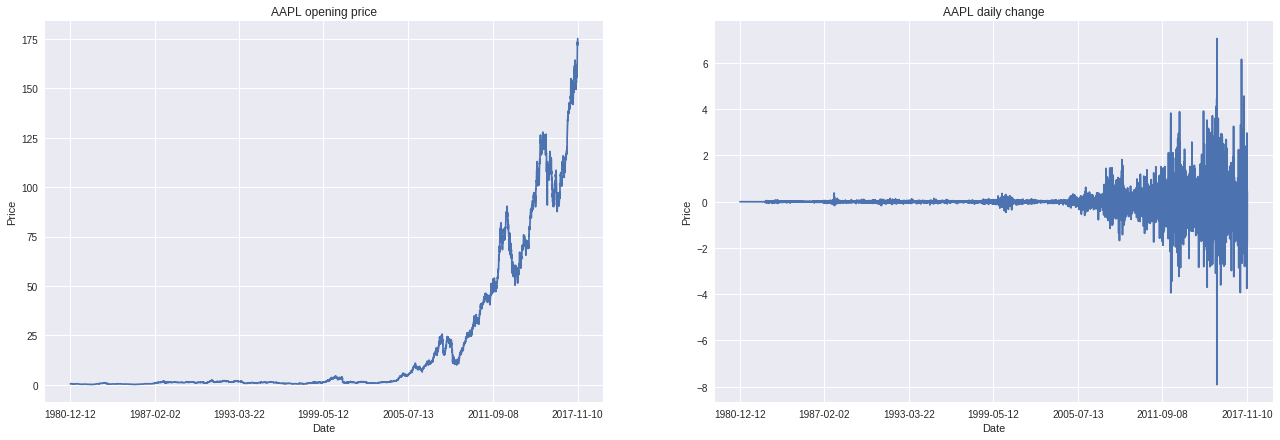

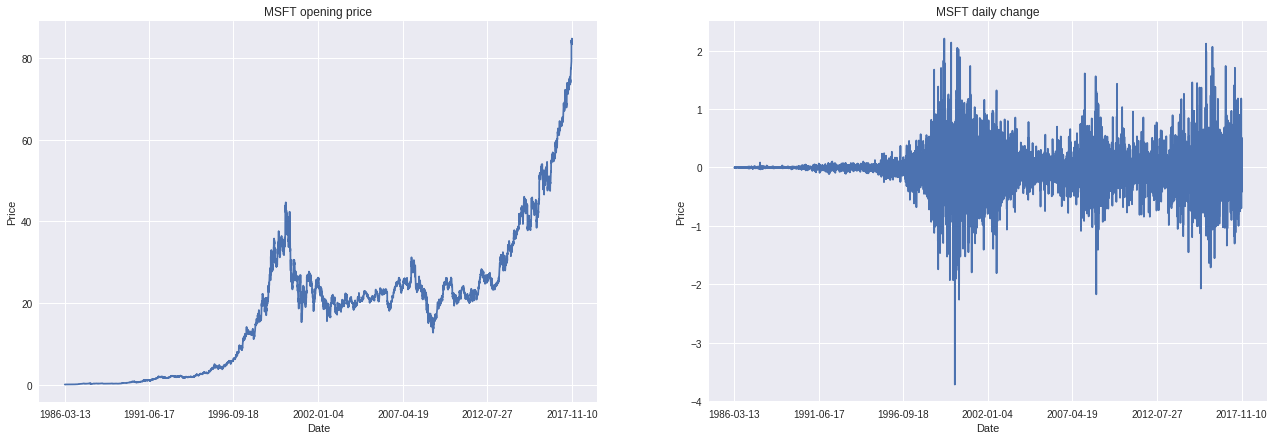

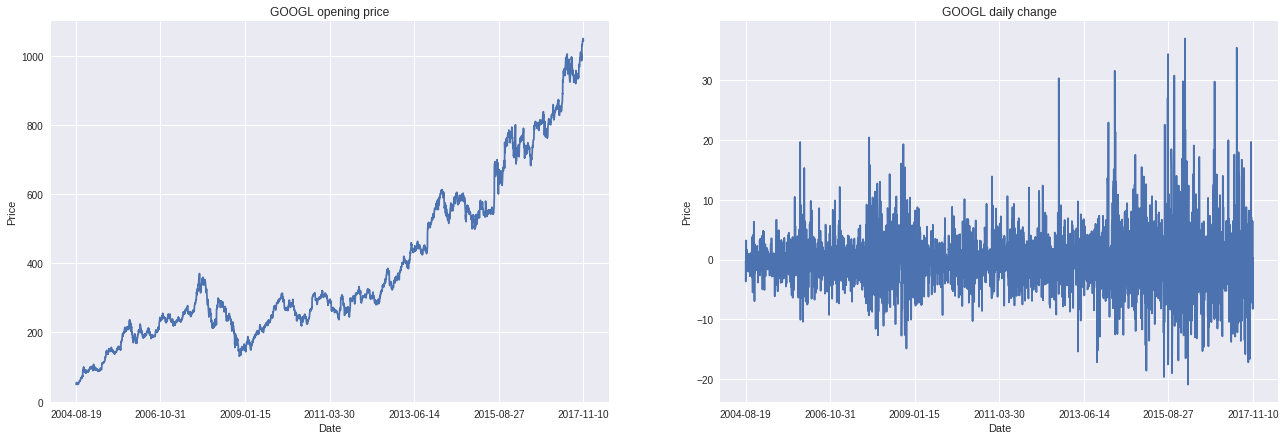

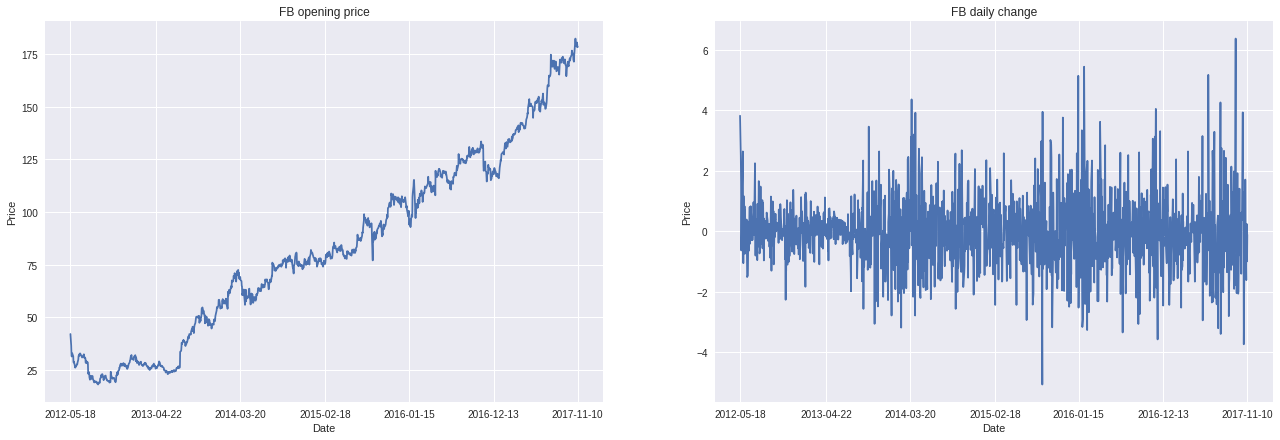

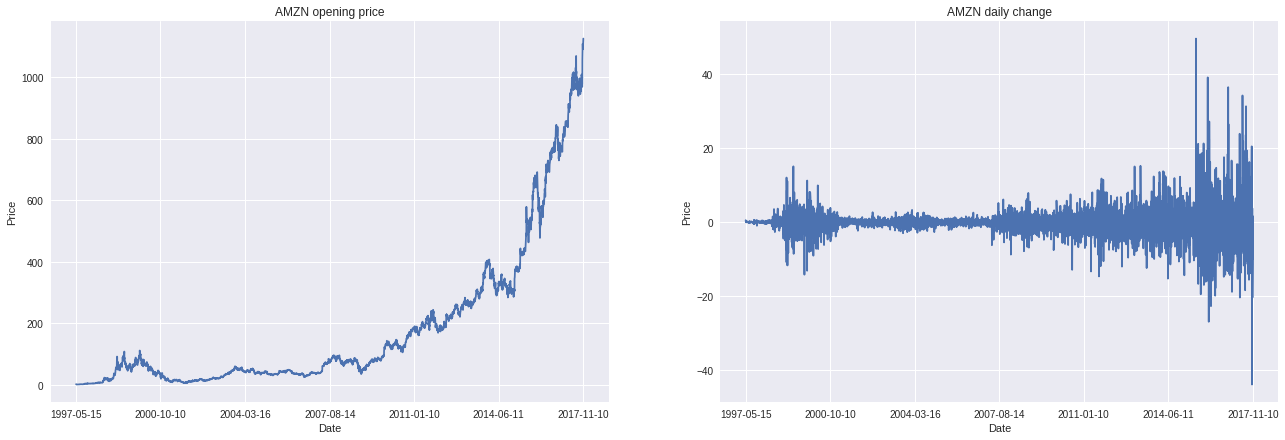

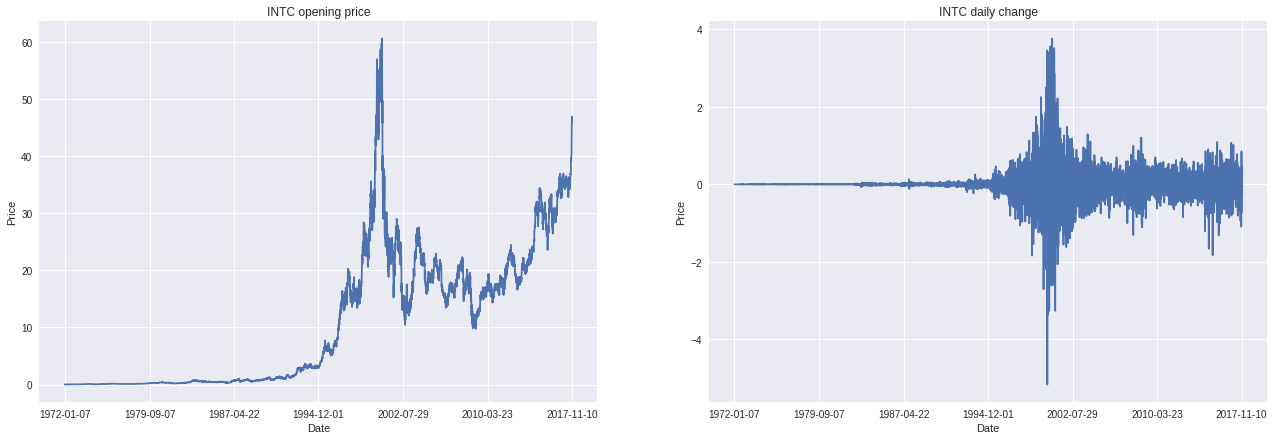

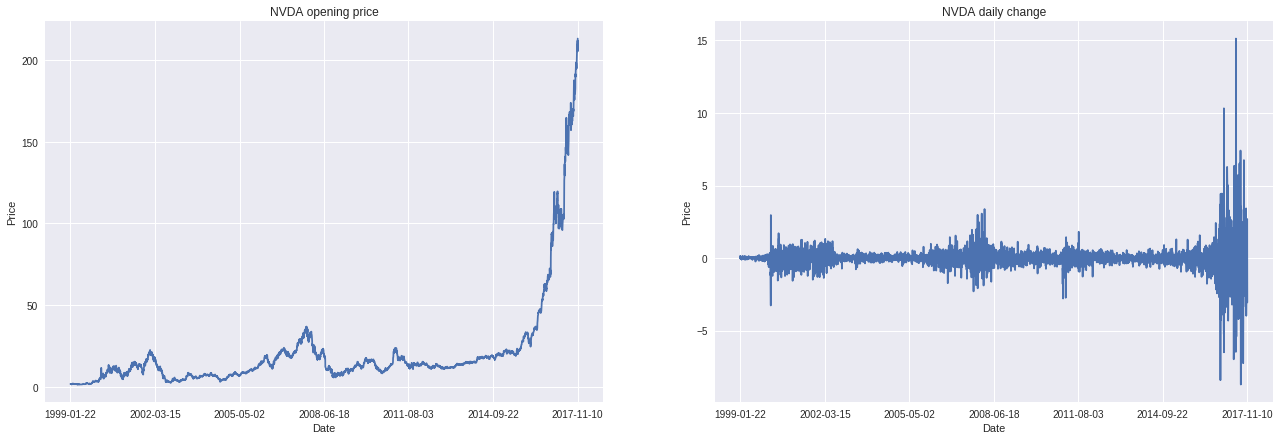

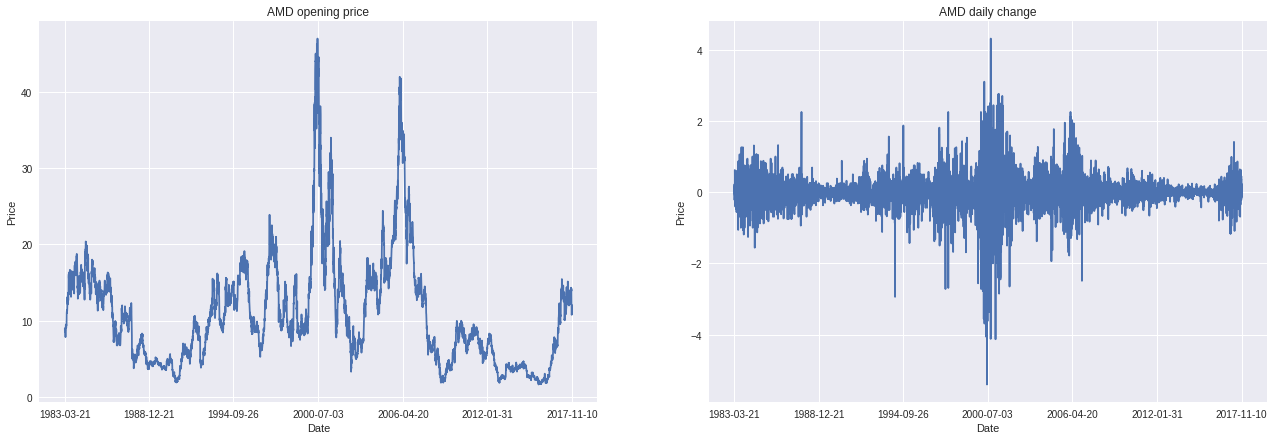

In [0]:
# Drawing diagrams of the opening prices and the price changes of 
# the stocks by companies
title = [' opening price', ' daily change']

for key in stock_dict.keys():
  x = stock_dict[key]['Timestamp']
  y = [
      stock_dict[key]['Open'], 
      stock_dict[key]['Open'] - stock_dict[key]['Close']
  ]
  
  timestamp, date_string = convert_to_ticks(x.values, n=6)

  fig, ax = plt.subplots(1, 2, figsize=(22, 7))
  for i in range(2):
    ax[i].plot(x, y[i])
    ax[i].set_xticks(timestamp)
    ax[i].set_xticklabels(date_string)
    ax[i].set_xlabel('Date')
    ax[i].set_ylabel('Price')
    ax[i].set_title(key + title[i])
  
  plt.show()

# Data preprocessing

> Finally we can normalize our data, and split it into train, validation and test datasets

In [0]:
# Scalers to transform values into [0, 1] interval and inverse transform back to normal values
scalers = {}

In [0]:
# Normalizing datasets
for k, df in stock_dict.items():
  scaler = MinMaxScaler()
  df[['Open', 'High', 'Low', 'Close', 'Volume']] = \
    scaler.fit_transform(df[['Open', 'High', 'Low', 'Close', 'Volume']])
  scalers[k] = scaler

In [0]:
# Selecting timespans where we have data from all companies
start_at = []
for k, df in stock_dict.items():
  start_at.append(df.values[0, 0])
  
for k, df in stock_dict.items():
  df = df.loc[df['Timestamp'] >= max(start_at)]
  df = df.reset_index(drop=True)

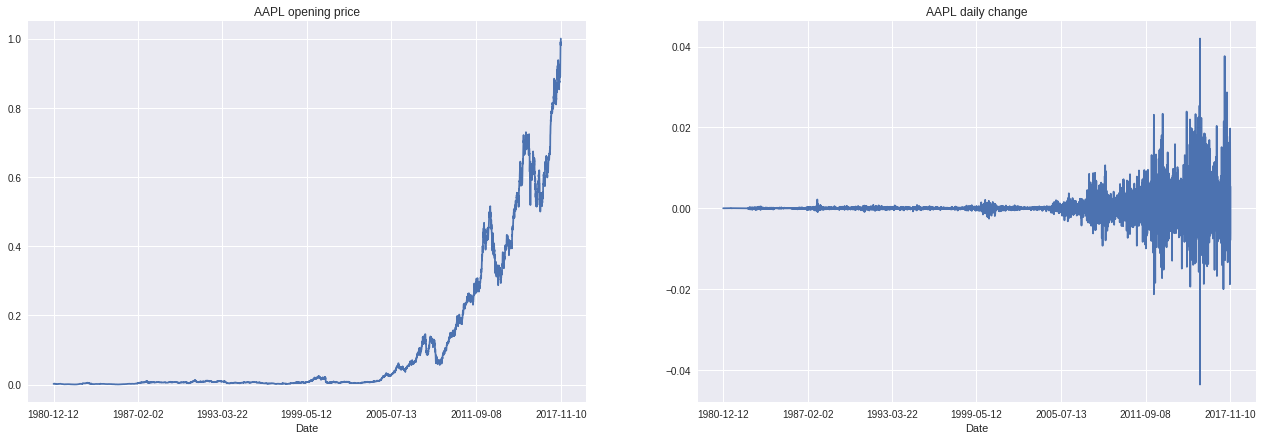

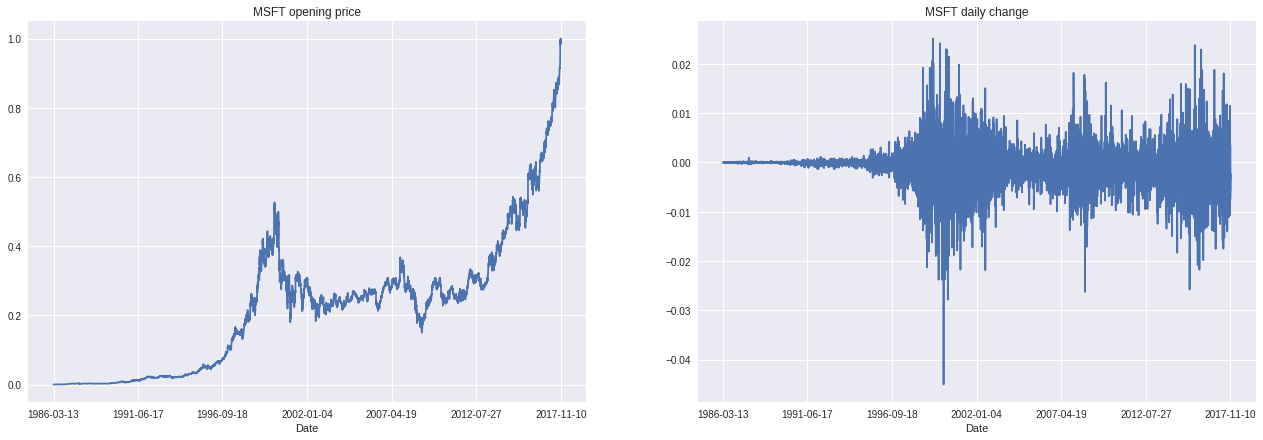

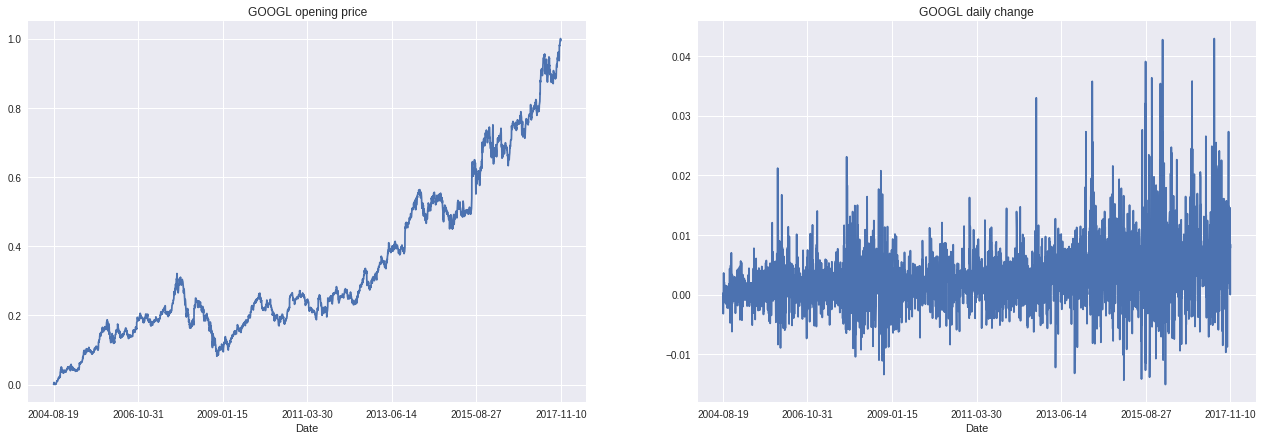

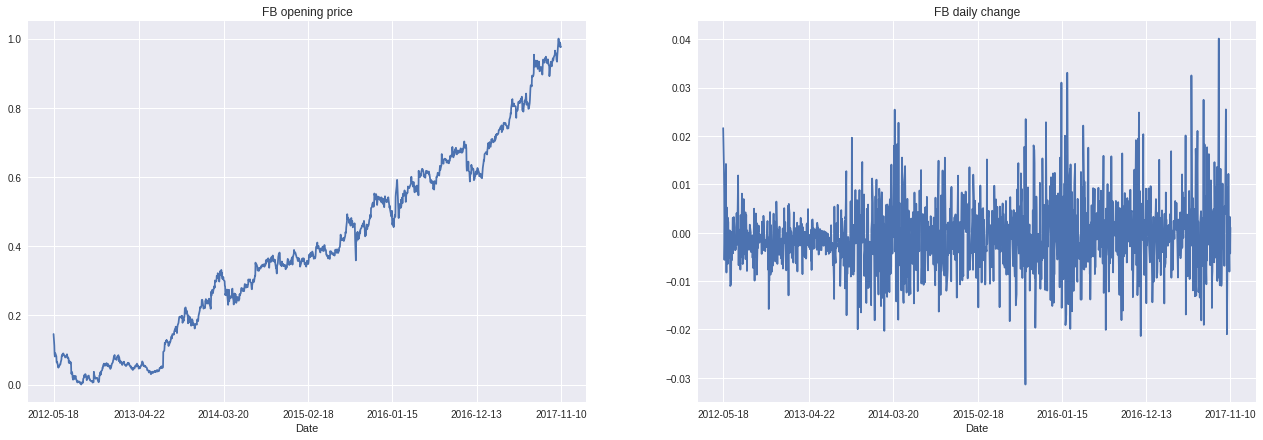

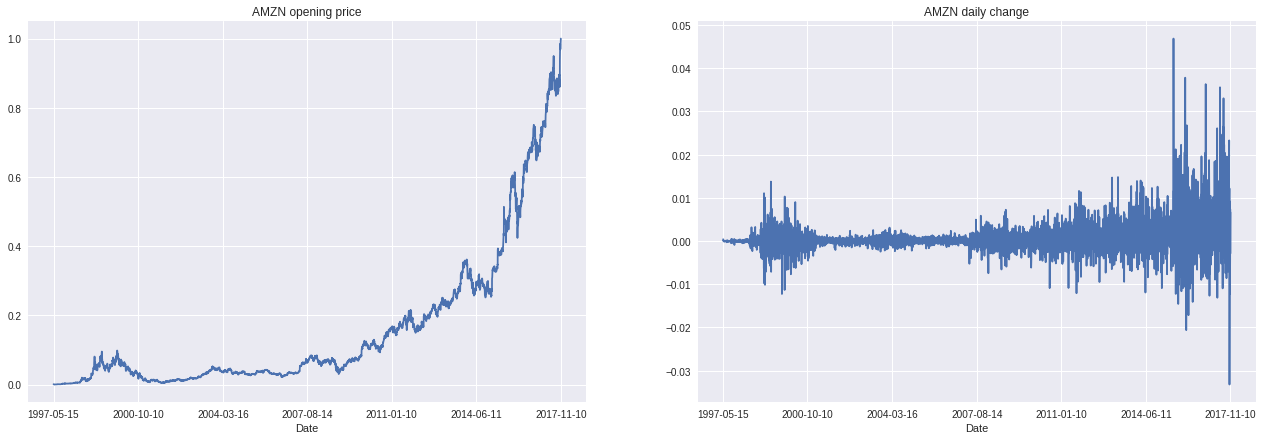

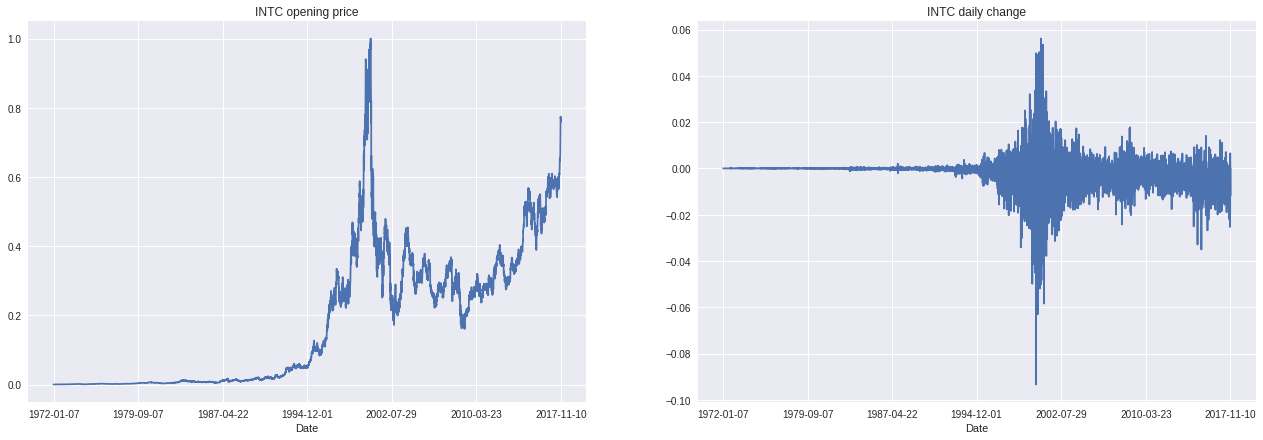

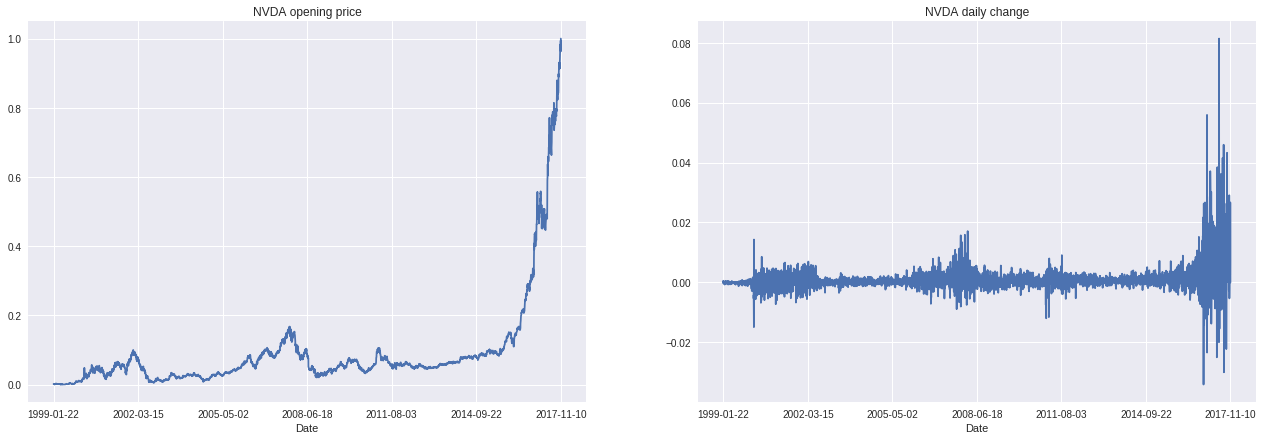

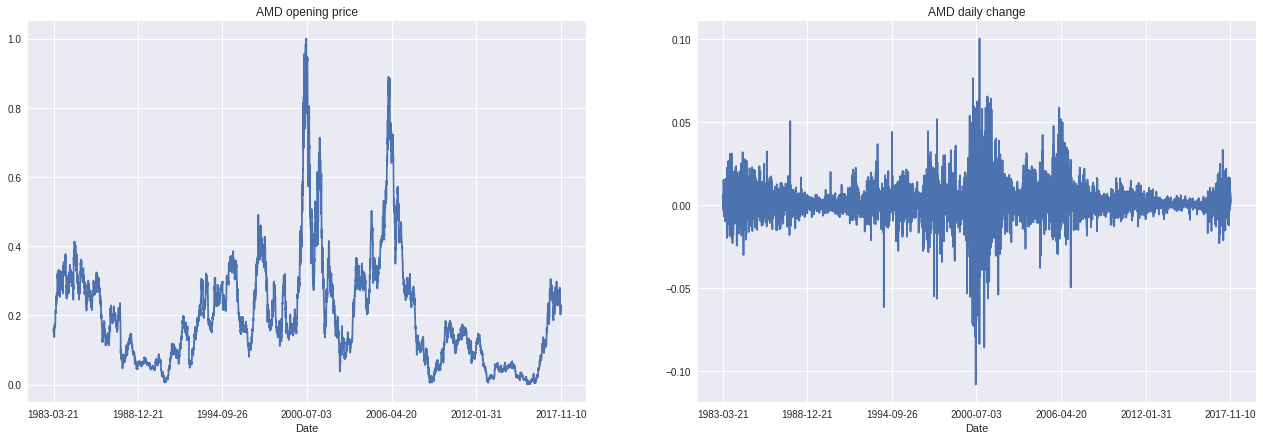

In [0]:
# Visualize common timespan (scaled values)
title = [' opening price', ' daily change']

for key in stock_dict.keys():
  x = stock_dict[key]['Timestamp']
  y = [
      stock_dict[key]['Open'], 
      stock_dict[key]['Open'] - stock_dict[key]['Close']
  ]
  
  timestamp, date_string = convert_to_ticks(x.values, n=6)

  fig, ax = plt.subplots(1, 2, figsize=(22, 7))
  for i in range(2):
    ax[i].plot(x, y[i])
    ax[i].set_xticks(timestamp)
    ax[i].set_xticklabels(date_string)
    ax[i].set_xlabel('Date')
    ax[i].set_title(key + title[i])
  
  plt.show()

In [0]:
# Calculate Pearson correlation coefficients
stock_correlations = {}
list_of_names = list(stock_dict.keys())

for i1 in range(len(list_of_names)):
  for i2 in range(i1+1, len(list_of_names)):
    # We iterate through the companies in a way that all pairings only happen once
    key1 = list_of_names[i1]
    key2 = list_of_names[i2]
    dataframe1 = stock_dict[key1]
    dataframe2 = stock_dict[key2]
    # We calculate the time frame intersection between the data of the two companies
    ins = set(dataframe1.values[:, 0]).intersection(set(dataframe2.values[:, 0]))
    df1_kozos = dataframe1.loc[dataframe1['Timestamp'].isin(ins)]
    df2_kozos = dataframe2.loc[dataframe2['Timestamp'].isin(ins)]
    # We calculate and store the calculated results
    tmp = pearsonr(df1_kozos.values[:, 1], df2_kozos.values[:, 1])
    stock_correlations[(key1, key2)] = [tmp[0], tmp[1]]

In [0]:
# Preparing correlation data for seaborn heatmap
stock_table = np.full(shape=(8, 8), fill_value=np.NaN)
for i1 in range(len(list_of_names)):
  for i2 in range(i1+1, len(list_of_names)):
    key1 = list_of_names[i1]
    key2 = list_of_names[i2]
    stock_table[i1, i2] = stock_correlations[(key1, key2)][0]
# Create pandas dataframe from the correlation 2D array
df = pd.DataFrame(stock_table, index=list_of_names, columns=list_of_names)
# Seaborn heatmap requires the axes to be named
df = df.rename_axis('Stocks A')
df = df.rename_axis('Stocks B', axis="columns")
# First columns contains only NaN, so we can drop it
df = df.drop(df.columns[0], axis=1)
# Last row contains only NaN, so we can drop it
df = df.drop(df.index[len(df)-1])

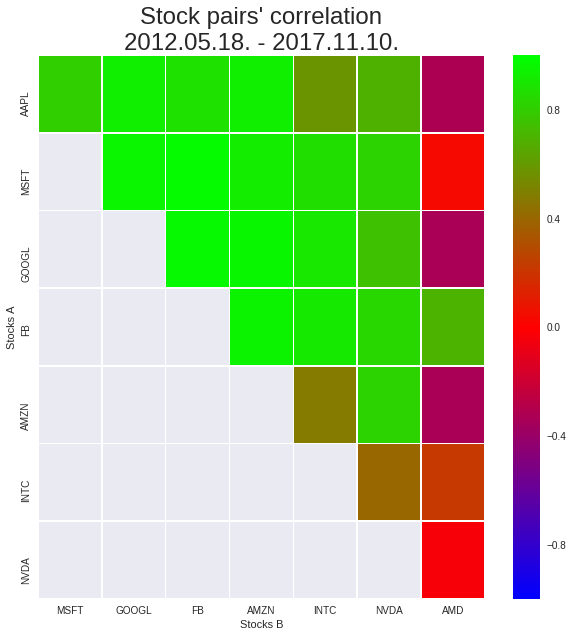

In [0]:
# Drawing a Seaborn heatmap for the correlations
f, ax = plt.subplots(figsize=(10, 10))
plt.title("Stock pairs' correlation\n2012.05.18. - 2017.11.10.", fontsize=24)
ax = sns.heatmap(df, linewidths=.5, ax=ax, cmap='brg', vmin=-1.0, vmax=1.0)

In [0]:
# Train-Valid_Test split
valid_split = 0.7
test_split = 0.85

train_stock, valid_stock, test_stock = {}, {}, {}

for k, df in stock_dict.items():
  vals = df.values
  vs = int(len(vals) * valid_split)
  ts = int(len(vals) * test_split)
  train_stock[k] = vals[:vs]
  valid_stock[k] = vals[vs:ts]
  test_stock[k] = vals[ts:]
  print(k)
  print('\ttrain length:', len(train_stock[k]))
  print('\tvalid length:', len(valid_stock[k]))
  print('\ttest  length:', len(test_stock[k]))

AAPL
	train length: 6517
	valid length: 1397
	test  length: 1397
MSFT
	train length: 5588
	valid length: 1197
	test  length: 1198
GOOGL
	train length: 2333
	valid length: 500
	test  length: 500
FB
	train length: 966
	valid length: 207
	test  length: 208
AMZN
	train length: 3611
	valid length: 774
	test  length: 774
INTC
	train length: 8089
	valid length: 1733
	test  length: 1734
NVDA
	train length: 3313
	valid length: 710
	test  length: 710
AMD
	train length: 6115
	valid length: 1311
	test  length: 1311


# Plans

* news headlines clustering (network)

* connect clusters to stock price change (network)

* train predictor on prices and news

# References

---
---

[Univariate feature selection](http://blog.datadive.net/selecting-good-features-part-i-univariate-selection/)

---

[Huge Stock Market Dataset](https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs)

[Google, Amazon, Facebook, Aapple stock prices](https://www.kaggle.com/stexo92/gafa-stock-prices)

[New York Stock Exchange Database](https://www.kaggle.com/dgawlik/nyse)

# News headlines

In [0]:
# +++
key = 'AMZN'

In [0]:
# Lets Check how our news data files look
#For this purpose we load a list with the name of the files
FilesOfNews=['data/news/abcnews-date-text.csv','data/news/articles1.csv','data/news/articles2.csv','data/news/articles3.csv','data/news/RedditNews.csv','data/news/Combined_News_DJIA.csv','data/news/data.csv']

#During iteration we write out the first two and the last line of the files with thair length and name
for filePath in []: #FilesOfNews:
  !wc -l {filePath}
  !head -n 2 {filePath}
  !tail -n 1 {filePath}
  print()
  print()


In [0]:
# Loading in data
import csv
import sys

#For such a big file we have to set a new limit for csv
csv.field_size_limit(sys.maxsize)

#We read in the data and print it out with it length as checking
NewsContent=[]
file='data/news/abcnews-date-text.csv'

counter=0
DatabaseContent=[]
with open(file,'r') as NewsFile:
  NewsReader=csv.DictReader(NewsFile)
  for line in NewsReader:
    if line != "":
      NewsContent.append(line)
      
print(NewsContent[0])
print(len(NewsContent))

OrderedDict([('publish_date', '20030219'), ('headline_text', 'aba decides against community broadcasting licence')])
1103665


In [0]:
# using nltk it is much easier to create the word vectors
import nltk
nltk.download('punkt')

#WordCountVectors is going to be the dictionary we are going to store all existing word and the count of their accurance
WordCountVectors={}
for name in ['apple', 'amazon', 'facebook', 'google']:
  WordCountVectors[name]={}
  for line in NewsContent:
    if(name in line['headline_text']):
      words=nltk.word_tokenize(line['headline_text'])
      for word in words:
        if(word in WordCountVectors[name].keys()):
          WordCountVectors[name][word]=WordCountVectors[name][word]+1
        else:
          WordCountVectors[name][word]=1     

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [0]:
# as a check we are printing the word vector and the count of the words relevant for amazon
print(WordCountVectors['amazon'])
sum=0
for wordC in WordCountVectors['amazon'].values():
  sum+=wordC
print(sum)

{'dinosaurs': 1, 'once': 1, 'roamed': 1, 'brazils': 2, 'amazon': 119, 'report': 2, 'amazoncom': 1, 'posts': 1, 'first': 3, 'full': 1, 'year': 1, 'profit': 2, 'brazil': 14, 'reveals': 1, 'action': 1, 'plan': 5, 'bodies': 1, 'of': 20, '26': 1, 'diamond': 1, 'miners': 1, 'found': 3, 'in': 19, 'rescuers': 1, 'scour': 1, 'for': 11, 'plane': 2, 'crash': 4, 'survivors': 2, 'says': 7, 'foreign': 1, 'media': 2, 'distort': 1, 'burning': 1, 'makes': 1, 'a': 2, 'leading': 1, 'polluter': 1, 'reports': 2, 'shares': 3, 'fall': 1, 'fires': 1, 'behind': 1, 'weather': 1, 'pattern': 1, 'changes': 1, 'record': 3, 'christmas': 3, 'sales': 3, 'google': 4, 'deliver': 2, 'stellar': 1, 'profits': 1, 'american': 1, 'nun': 1, 'shot': 1, 'dead': 2, 'plans': 1, 'vast': 1, 'reserve': 1, 'to': 43, 'stem': 1, 'logging': 2, 'peru': 5, 'announces': 3, 'protection': 3, 'zone': 1, 'amazonian': 4, 'ants': 2, 'use': 1, 'torture': 1, 'rack': 1, 'kill': 1, 'prey': 1, 'land': 2, 'clearing': 1, 'accelerates': 1, 'opens': 1, 'c

In [0]:
#We have to reformat the date so we have the same format as the stock data
# datetime.strptime(x[0], '%Y-%m-%d').timestamp()

for line in NewsContent:
  line['date']=datetime.strptime(line.pop('publish_date'), '%Y%m%d').timestamp()
  

print(NewsContent[0])

OrderedDict([('headline_text', 'aba decides against community broadcasting licence'), ('date', 1045612800.0)])


In [0]:
#After this we destroy the unrelevant words
top_words = 300

from collections import Counter
word_counter = Counter((' '.join([i['headline_text'] for i in NewsContent])).split(' '))
keymap = {item[0]: i+1 for i, item in enumerate(word_counter.most_common(top_words))}

In [0]:
#We collect the words to have them in a per day format
news_content_parsed2 = [[i['date'], [keymap[j] for j in i['headline_text'].split(' ') if j in keymap.keys()]] for i in NewsContent]

In [0]:
#lets check the format
news_content_parsed2[-1]

[1514678400.0, [74, 7, 135, 257]]

In [0]:
#Then we create a dictionary so we can combine the dates belonging to the same date into one big list
wordsByDate={}
for wordOfNewWithDate in news_content_parsed2:
  if wordOfNewWithDate[0] not in wordsByDate:
        wordsByDate[wordOfNewWithDate[0]]=[]
  wordsByDate[wordOfNewWithDate[0]].extend(wordOfNewWithDate[1])

#for date in wordsByDate.keys():
#  wordsByDate[date]=sorted(wordsByDate[date])

In [0]:
# +++
#We eliminate all data wh2ich's date is out of the time range of the stock data
debug_date_store = []
stock_dates=stock_dict[key].values[:, 0]
daily_news = {}
for k, v in wordsByDate.items():
  if min(stock_dates) < k < max(stock_dates):
    debug_date_store.append(int(k/86400)*86400)
    daily_news[int(k/86400)*86400] = daily_news.get(int(k/86400)*86400, []) + v

In [0]:
#Lets see how many words we have on each day so we can decide what size of input we should have for the network
a = []
for words in wordsByDate.values():
  a.append(len(words))

In [0]:
#print sizes
print(min(a), np.mean(a), max(a))

36 501.24695684249355 957


In [0]:
# word vectors max. (kind of...) length
review_length = 600

In [0]:
from pandas import DataFrame
from pandas import concat
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

# Tesztelés az Apple részvényeivel

In [0]:
# +++
#Lets eliminate all dates that are not in the stock data

#The dates that are in the stock data
stock_dates=stock_dict[key].values[:, 0]
#The dates that are in the news data
new_dates=list(daily_news.keys())

#elimination of dates of news that are not in the stock range
for date in new_dates:
  if date not in stock_dates:
    daily_news.pop(date, None)
# Add dates of the stock data to the news data with an empty llist
for date in stock_dates:
  if date not in new_dates:
    daily_news[date]=[]
#Check if they are the same length
print(len(stock_dates), len(daily_news.keys()))

5159 5159


In [0]:
# +++
# Padding stuff
dn = np.asarray([np.asarray(x[1]) for x in list(daily_news.items())])
dn = np.asarray([np.pad(x[:review_length], (0, review_length-len(x[:review_length]) if len(x[:review_length]) < review_length else 0), 'constant') for x in dn])

In [0]:
train_news = dn[:len(train_stock[key])]
valid_news = dn[len(train_stock[key]):len(train_stock[key])+len(valid_stock[key])]
test_news = dn[len(train_stock[key])+len(valid_stock[key]):]

print(len(train_news), len(valid_news), len(test_news))

3611 774 774


In [0]:
# +++
df = stock_dict[key]
dfValues = df.values[:, 1]  # Open ertekek

# train-valid-test split
train_part = dfValues[:len(train_stock[key])]
valid_part = dfValues[len(train_stock[key]):len(train_stock[key])+len(valid_stock[key])]
test_part = dfValues[len(train_stock[key])+len(valid_stock[key]):]

# Scaling values
train_scaler = MinMaxScaler()
train_part = train_scaler.fit_transform(np.reshape(train_part, (-1, 1)))

valid_scaler = MinMaxScaler()
valid_part = valid_scaler.fit_transform(np.reshape(valid_part, (-1, 1)))

test_scaler = MinMaxScaler()
test_part = test_scaler.fit_transform(np.reshape(test_part, (-1, 1)))

# Converting to supervised
train_supervised = series_to_supervised(list(train_part.flatten()), 7).values
valid_supervised = series_to_supervised(list(valid_part.flatten()), 7).values
test_supervised = series_to_supervised(list(test_part.flatten()), 7).values

# Reshape for conv layer
train_stock_input = np.reshape(train_supervised[:, :7], (-1, 7, 1))
valid_stock_input = np.reshape(valid_supervised[:, :7], (-1, 7, 1))
test_stock_input = np.reshape(test_supervised[:, :7], (-1, 7, 1))

train_stock_output = train_supervised[:, 7:]
valid_stock_output = valid_supervised[:, 7:]
test_stock_output = test_supervised[:, 7:]

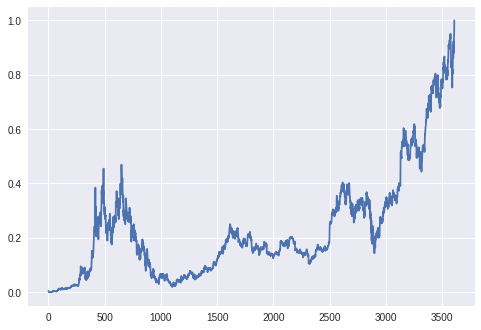

In [0]:
plt.plot(train_part)

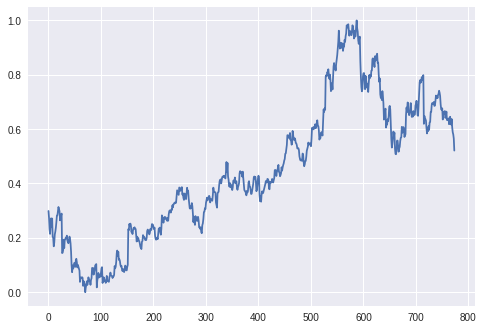

In [0]:
plt.plot(valid_part)

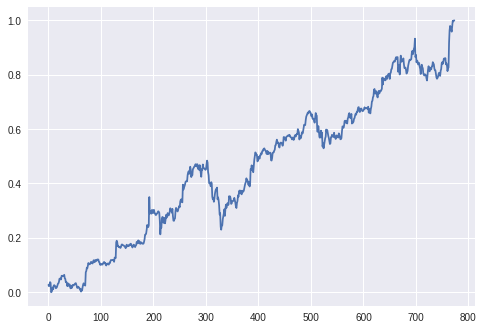

In [0]:
plt.plot(test_part)

In [0]:
#import keras
from keras import regularizers

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

from keras.models import Model
from keras.models import load_model

from keras.layers import Activation
from keras.layers import Bidirectional
from keras.layers import concatenate
from keras.layers import Conv1D
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers import Flatten
from keras.layers import Input
from keras.layers import MaxPooling1D
from keras.layers import LSTM
from keras.layers import Reshape

Using TensorFlow backend.


In [0]:
# Stock prices branch
stock_input = Input(shape=(7, 1,), dtype='float32', name='prices_input')
stock_conv1 = Conv1D(filters=32, kernel_size=5, activation='relu')(stock_input)
stock_maxp1 = MaxPooling1D(2)(stock_conv1)
#stock_dense1 = Dense(32, activation='relu')(stock_maxp1)
#stock_dense2 = Dense(32, activation='relu')(stock_dense1)
#stock_conv2 = Conv1D(filters=1, kernel_size=5, activation='relu')(stock_maxp1)
#stock_maxp2 = MaxPooling1D()(stock_conv2)
stock_dense3 = Dense(16, activation='relu')(stock_maxp1)
stock_dense4 = Dense(64, activation='relu')(stock_dense3)

In [0]:
# Stock prices branch
stock_input = Input(shape=(7, 1,), dtype='float32', name='prices_input')
stock_conv1 = Conv1D(16, 5, activation='relu', padding='same')(stock_input)
stock_maxp1 = MaxPooling1D(2)(stock_conv1)
stock_conv2 = Conv1D(16, 5, activation='relu', padding='same')(stock_maxp1)
stock_maxp2 = MaxPooling1D(2)(stock_conv2)
stock_dense3 = Dense(64, activation='relu')(stock_maxp2)
stock_dense4 = Dense(64, activation='relu')(stock_dense3)

In [0]:
# News branch
news_input = Input(shape=(review_length,), dtype='int32', name='news_input')
news_embedding = Embedding(top_words, 64, input_length=review_length)(news_input)
news_lstm = Bidirectional(LSTM(8))(news_embedding)
news_dense = Dense(64, activation='relu')(news_lstm)
news_reshape = Reshape((1, 64, ))(news_dense)

In [0]:
# Network trunk
conc_input = concatenate([stock_dense4, news_reshape])
conc_lstm1 = Bidirectional(LSTM(8, return_sequences=True))(conc_input)
conc_lstm2 = Bidirectional(LSTM(4))(conc_lstm1)
conc_dense1 = Dense(32, activation=('relu'))(conc_lstm2)
conc_drop1 = Dropout(0.2)(conc_dense1)
conc_dense2 = Dense(16, activation=('relu'))(conc_drop1)
conc_drop2 = Dropout(0.2)(conc_dense2)
conc_dense3 = Dense(8, activation=('relu'))(conc_drop2)
conc_drop3 = Dropout(0.2)(conc_dense3)
conc_dense4 = Dense(1, activation=('sigmoid'), name='main_output')(conc_drop3)

In [0]:
!rm weights.hdf5

rm: cannot remove 'weights.hdf5': No such file or directory


In [0]:
!ls

1539302400_all.csv  data  kaggle.json  sample_data


In [0]:
callbacks = [
    EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10, verbose=1, mode='min'),
    ModelCheckpoint('weights.hdf5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')
]

In [0]:
# Setting up and Training the Network
model = Model(inputs=[stock_input, news_input], outputs=[conc_dense4])

model.compile(optimizer='rmsprop', loss='mae')

history = model.fit([train_stock_input, train_news[:-7]], [train_stock_output], epochs=10000, batch_size=128, callbacks=callbacks, validation_data=([valid_stock_input, valid_news[:-7]], [valid_stock_output]))

Train on 3604 samples, validate on 767 samples
Epoch 1/10000
3604/3604 [==============================] - 99s 28ms/step - loss: 0.2828 - val_loss: 0.2185

Epoch 00001: val_loss improved from inf to 0.21847, saving model to weights.hdf5
Epoch 2/10000
3604/3604 [==============================] - 92s 25ms/step - loss: 0.1932 - val_loss: 0.2680

Epoch 00002: val_loss did not improve from 0.21847
Epoch 3/10000
3604/3604 [==============================] - 92s 26ms/step - loss: 0.1706 - val_loss: 0.2550

Epoch 00003: val_loss did not improve from 0.21847
Epoch 4/10000
3604/3604 [==============================] - 92s 26ms/step - loss: 0.1460 - val_loss: 0.1867

Epoch 00004: val_loss improved from 0.21847 to 0.18671, saving model to weights.hdf5
Epoch 5/10000
3604/3604 [==============================] - 92s 26ms/step - loss: 0.1161 - val_loss: 0.1482

Epoch 00005: val_loss improved from 0.18671 to 0.14823, saving model to weights.hdf5
Epoch 6/10000
3604/3604 [==============================] - 9

In [0]:
!ls -lh

total 448K
-rw-r--r-- 1 root root  12K Oct 12 00:30 1539302400_all.csv
drwxr-xr-x 6 root root 4.0K Dec  9 17:28 data
-rw-r--r-- 1 root root   64 Dec  9 17:16 kaggle.json
drwxr-xr-x 2 root root 4.0K Dec  5 17:39 sample_data
-rw-r--r-- 1 root root 418K Dec  9 18:29 weights.hdf5


In [0]:
model = load_model('weights.hdf5')

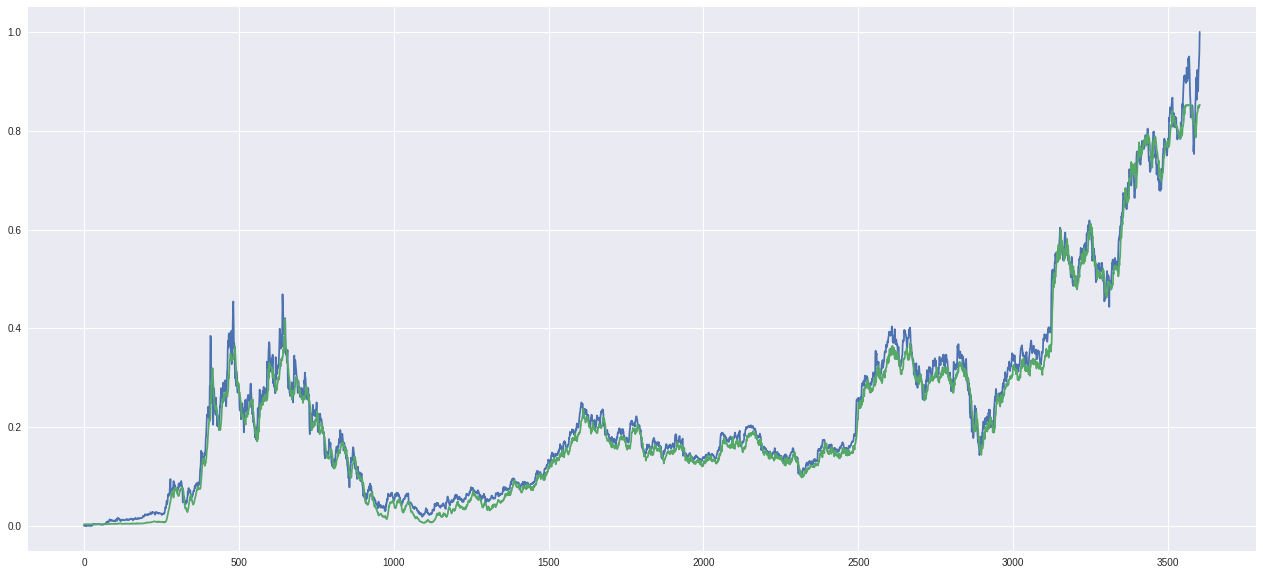

In [0]:
# Train data
preds = model.predict([train_stock_input, train_news])
plt.figure(figsize=(22, 10))
plt.plot(train_stock_output[1:])
plt.plot(preds)
plt.show()

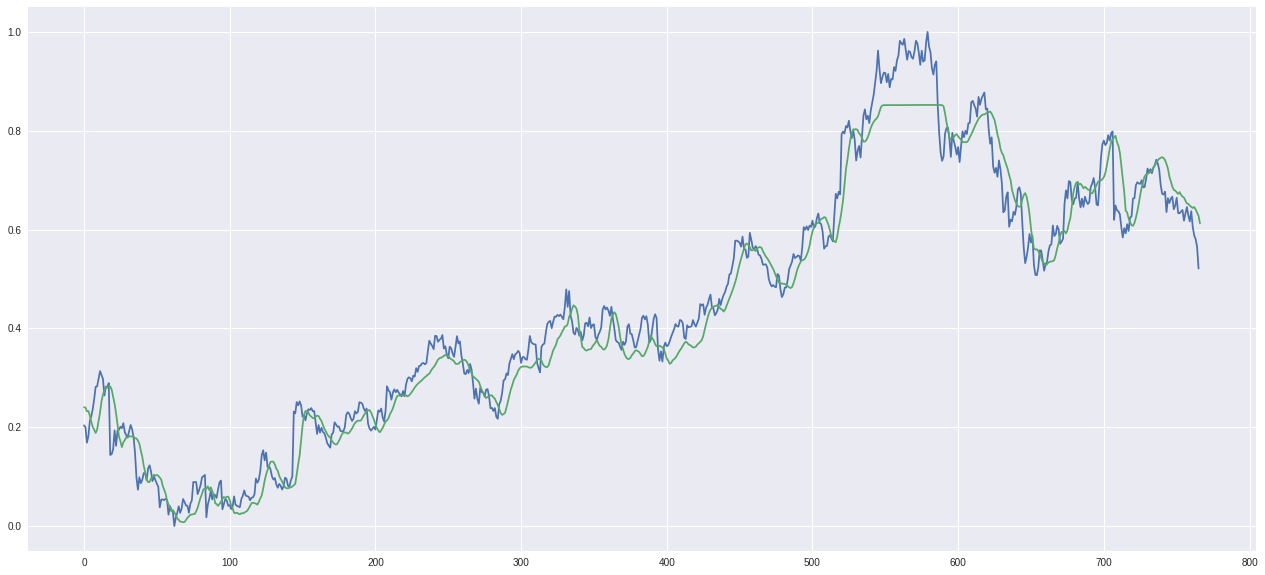

In [0]:
# Validation data
preds = model.predict([valid_stock_input, valid_news])
plt.figure(figsize=(22, 10))
plt.plot(valid_stock_output[1:])
plt.plot(preds)
plt.show()

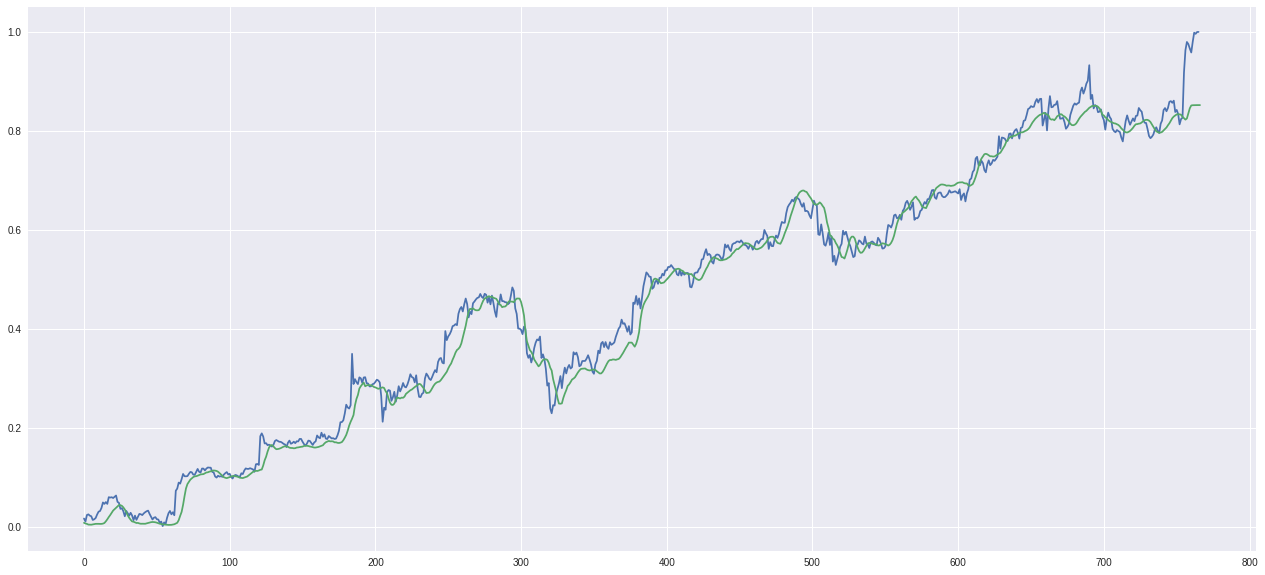

In [0]:
# Test data
preds = model.predict([test_stock_input, test_news])
plt.figure(figsize=(22, 10))
plt.plot(test_stock_output[1:])
plt.plot(preds)
plt.show()

In [0]:
from sklearn.metrics import mean_absolute_error

# preds currently contains the test predictions
test_mae = mean_absolute_error(test_stock_output, preds)
test_mae

0.021249412676904833

# Testing

In [0]:
# Preparing test data

test_count = 40
test_len = test_stock_input.shape[0]/test_count
test_starters = []
for i in range(test_count):
  test_starters.append(test_stock_input[int(i*test_len)])

In [0]:
# Running test predictions from points in the test data

test_results = []

for j in range(test_count):
  print('Test ', j)
  current_test = int(test_len * j)
  predictions = list(test_starters[j])
  
  for i in range(int(test_len)):
    stock_in = np.reshape(predictions[-7:], (1, 7, 1))
    news_in = np.reshape(test_news[current_test], (1, 600))
    prediction = model.predict([stock_in, news_in])
    predictions.append(prediction)
    current_test += 1
    
  test_results.append(predictions)

Test  0
Test  1
Test  2
Test  3
Test  4
Test  5
Test  6
Test  7
Test  8
Test  9
Test  10
Test  11
Test  12
Test  13
Test  14
Test  15
Test  16
Test  17
Test  18
Test  19
Test  20
Test  21
Test  22
Test  23
Test  24
Test  25
Test  26
Test  27
Test  28
Test  29
Test  30
Test  31
Test  32
Test  33
Test  34
Test  35
Test  36
Test  37
Test  38
Test  39


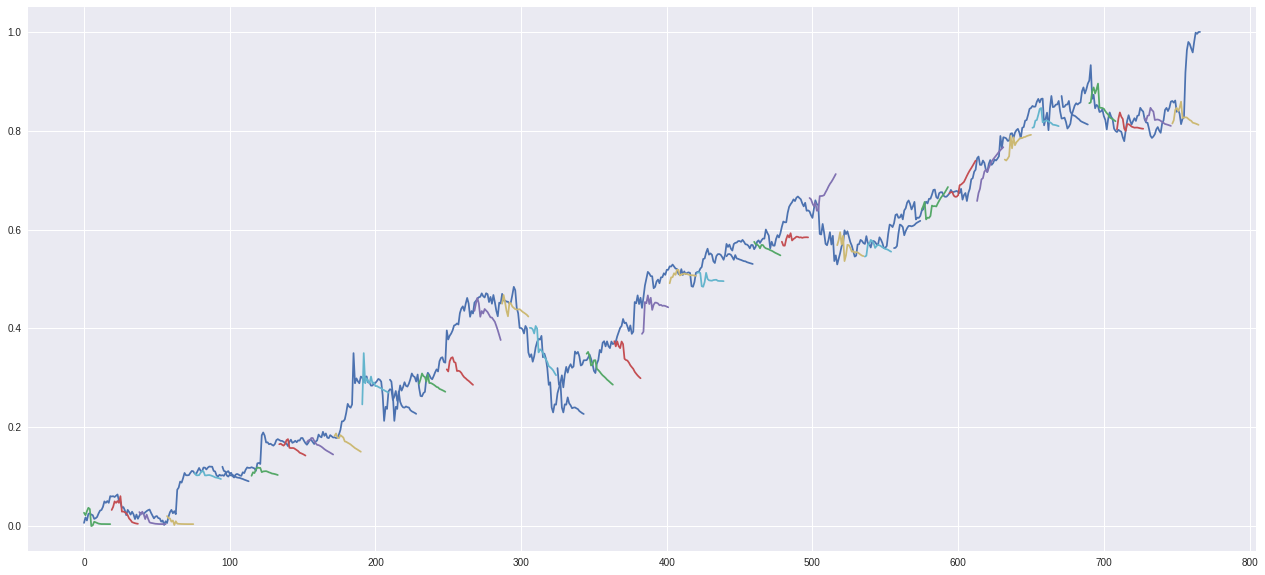

In [0]:
# Showing test results

plt.figure(figsize=(22, 10))
plt.plot(test_stock_output)
for j in range(test_count):
  plt.plot(list(range(int(test_len * j), int(test_len * j)+int(test_len))), test_results[j][:-7])
plt.show()